<a href="https://colab.research.google.com/github/klausgottlieb/crut-monte-carlo-replication/blob/main/notebook_02_basis_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 02 — Asset Basis, Step-Up, and the Concentrated Position Problem
## *When Do Charitable Remainder Unitrusts Outperform? A Monte Carlo Analysis*
### Klaus Gottlieb, JD, MS, MBA — Wealth Care Lawyer, Cayucos, CA

---

## Purpose and Scope

This notebook extends the baseline analysis to a **three-benchmark framework** that addresses two peer review comments while simultaneously modeling the most realistic planning scenario facing concentrated position holders.

### Peer Review Comments Addressed

> **Comment #3:** *"The benchmark 60% turnover seems high."*

> **Comment #4:** *"The analysis ignores a step-up in basis for the benchmark (which would essentially eliminate the tax liability and favor the benchmark over the CRUT)."*

As established in earlier analysis, these two comments are structurally linked and cannot be addressed independently. Comment #3 affects how much unrealized gain accumulates in the benchmark portfolio; Comment #4 determines what happens to that unrealized gain at death. Lowering turnover (Comment #3) makes the step-up (Comment #4) more consequential, because a low-turnover portfolio accumulates more unrealized gain for the step-up to protect.

This notebook addresses both comments across all four turnover levels (0%, 20%, 40%, 60%) by adding a third benchmark that represents the most realistic planning alternative.

---

## The Three-Benchmark Framework

The central question in a CRUT consultation is never abstract. A client sits across the table holding a specific asset — typically a concentrated position with low basis and high volatility. The relevant alternatives are:

### Benchmark 1: Hold to Liquidation
*"I keep the asset and sell it sometime before I die."*

The donor retains the appreciated asset in a taxable account. Capital gains are realized gradually through annual portfolio turnover. At the end of the simulation horizon (the actuarial life expectancy of the two beneficiaries), the donor (or their estate) liquidates the portfolio and pays LTCG tax on the remaining unrealized gain.

**This was the only benchmark in the submitted manuscript.** It is appropriate for clients who would otherwise sell the asset during their lifetime — for example, a business founder who is considering an exit.

**Key parameters:**
- Starting corpus: \\$1,000,000 (same as CRUT)
- Starting basis: \\$200,000 (20% of FMV)
- Turnover: 0–60% annually
- Terminal event: LTCG tax on remaining unrealized gain

### Benchmark 2: Hold to Death (Step-Up)
*"I keep the asset and hold it until I die. My heirs inherit it."*

The donor retains the appreciated asset but specifically intends to hold it until death, allowing heirs to receive a stepped-up basis under IRC §1014. The embedded capital gain is permanently eliminated. This is the reviewer's concern.

**This is the most favorable possible benchmark assumption for the holdstrategy.** It is appropriate for clients with estate planning motives — specifically, those whose primary alternative to the CRUT is a testamentary bequest of the appreciated asset.

**Key parameters:**
- Starting corpus: \\$1,000,000 (same as CRUT)
- Starting basis: \\$200,000, but stepped up to FMV at death (no terminal CG tax)
- Turnover: 0–60% annually
- Terminal event: No LTCG tax (basis resets to FMV at death)

**Important caveat:** Because the CRUT transfers the asset irrevocably to the trust, the charitable remainder passes to charity, not to heirs. There is no step-up on the trust corpus. Benchmark 2 captures the full economic value of the step-up that the CRUT permanently forfeits.

### Benchmark 3: Liquidate and Reinvest
*"I sell the concentrated position today, pay the tax, and reinvest in a diversified portfolio."*

The donor liquidates the concentrated position immediately, pays LTCG + NIIT + state tax on the full embedded gain, and reinvests the after-tax proceeds in a diversified portfolio identical in risk and return to the CRUT's investment strategy.

**This benchmark is added in this revision and was not in the submitted manuscript.** It represents the most realistic alternative for the clients most likely to be considering a CRUT — holders of concentrated, illiquid, or highly volatile positions who are motivated to diversify.

**Key parameters:**
- Gross FMV: \\$1,000,000
- Embedded gain: \\$800,000 (at 20% basis)
- Immediate tax: \\$800,000 × (20% LTCG + 3.8% NIIT + 9.3% state) = \\$800,000 × 33.1% = **\\$264,800**
- Starting corpus after tax: **\\$735,200** (the benchmark starts here, not at \\$1,000,000)
- Starting basis: \\$735,200 (clean — full step-up to reinvestment cost)
- Future turnover drag: applies only to gains above \\$735,200
- Return and volatility: identical to CRUT (μ = 7%, σ = 12% after diversification)
- Terminal event: LTCG tax on remaining unrealized gain above \\$735,200 basis

**The key economic insight of Benchmark 3:** The CRUT starts with \\$1,000,000 at work on day one. The liquidation-reinvest benchmark starts with only \\$735,200. The CRUT must generate sufficient distributions and deduction benefits to overcome the benchmark's eventual compounding advantage, but the benchmark begins with a structural 26.5% capital deficit.

This deficit has a counterintuitive implication: at *low* turnover, Benchmark 3 is actually *easier* for the CRUT to beat than Benchmark 1. At low turnover, the hold-liquidation benchmark (Benchmark 1) retains the full \\$1,000,000 and defers the embedded gain tax for 33 years — effectively borrowing \\$264,800 interest-free at the pre-tax return rate. At high turnover, this advantage is eroded annually, making Benchmark 1 less competitive.

---

## The Concentrated Position Context: Why Volatility Matters

A concentrated position typically carries substantially higher volatility than a diversified portfolio. A single-stock position or a real estate holding might have σ = 25–40%, compared to σ = 12% for a diversified equity portfolio.

**In this analysis, both the CRUT and the liquidation-reinvest benchmark diversify immediately.** The CRUT diversifies upon contribution (it can sell the concentrated position tax-free and reinvest in a diversified portfolio). The benchmark diversifies upon liquidation. Both then carry σ = 12% going forward.

This means the volatility reduction benefit of diversification is symmetric — it does not favor either strategy. What *does* favor the CRUT is that it achieves this diversification without the immediate tax hit that Benchmark 3 incurs.

The hold benchmarks (1 and 2) retain the concentrated position. In this notebook, they are modeled at σ = 12% (same as the diversified portfolio) for two reasons:
1. Consistency with Notebooks 00–01, which also use σ = 12%
2. Conservatism: using higher σ for the hold benchmarks would favor the CRUT (higher variance increases the risk of large benchmark losses, which the CRUT avoids)

A higher σ for the hold benchmarks is therefore the subject of a separate robustness check (Notebook 05) rather than the baseline analysis here.

---

## Zone Framework with Three Benchmarks

With three benchmarks, the planning zones become more nuanced:

| Zone | Condition | Recommendation |
|---|---|---|
| **Deep Green** | CRUT wins all three benchmarks (all ≥ 50%) | CRUT recommended regardless of client exit strategy |
| **Medium Green** | CRUT wins hold benchmarks; loses liq-reinvest (< 50%) | CRUT recommended if client intends to hold; consider alternatives if client plans to sell and diversify |
| **Yellow** | CRUT wins hold-liquidation only; loses step-up and liq-reinvest | CRUT only recommended if client will sell during life AND has no estate planning intent |
| **Red** | CRUT loses all three benchmarks (all < 50%) | CRUT not recommended |

Note: Because Benchmark 3 starts with less capital, the Deep Green zone (CRUT beats all three) is *larger* than the Green zone in the two-benchmark framework. The CRUT's full-corpus starting advantage works in its favor here.

---

## Figures Produced

1. **Win probability curves at 20% turnover** — all three benchmarks vs. basis fraction
2. **Win probability curves at 60% turnover** — all three benchmarks vs. basis fraction
3. **Win probability at baseline (20% basis)** — bar chart across all four turnover levels × three benchmarks
4. **Four-zone traffic light at 20% turnover** — all three benchmarks simultaneously
5. **Four-zone traffic light at 60% turnover** — all three benchmarks simultaneously
6. **Gap chart** — two gaps: (a) cost of step-up assumption; (b) benefit of starting corpus advantage over liq-reinvest
7. **Planning decision table** — zone boundaries at all four turnover levels, all three benchmarks
8. **Heatmap** — basis × turnover for the liquidation-reinvest benchmark specifically

---

## Ground Truth from Prior Notebooks

- Baseline win probability (20% turnover, hold-liquidation): see Notebook 00 output
- Charitable deduction: \\$126,389 | Remainder factor: 0.1264 | PV tax benefit: \\$58,518
- Asset basis ranks **#5** of 12 parameters in OAT sensitivity (27.4pp range)
- Simulation horizon: **33 years** (Two Life 63/65 joint actuarial expectancy)

---

In [1]:
import subprocess, sys
subprocess.check_call([sys.executable, '-m', 'pip', 'install',
                       'numpy', 'matplotlib', 'scipy', '--quiet'])
print('Dependencies confirmed.')

Dependencies confirmed.


In [2]:
from dataclasses import dataclass, replace
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

plt.rcParams.update({
    'figure.dpi': 120,
    'font.family': 'sans-serif',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'figure.facecolor': 'white',
})

# Three benchmark types with display properties
BENCHMARKS = [
    {
        'type':  'hold_liquidation',
        'label': 'Hold to liquidation',
        'short': 'Hold-liq',
        'color': '#2171b5',
        'ls':    '-',
        'description': 'Donor holds asset, sells during life, pays LTCG at terminal sale',
    },
    {
        'type':  'hold_stepup',
        'label': 'Hold to death (IRC \u00a71014 step-up)',
        'short': 'Hold-step',
        'color': '#d73027',
        'ls':    '--',
        'description': 'Donor holds to death; heirs receive stepped-up basis, no LTCG tax',
    },
    {
        'type':  'liquidation_reinvest',
        'label': 'Liquidate and reinvest',
        'short': 'Liq-reinvest',
        'color': '#1a9641',
        'ls':    ':',
        'description': 'Donor sells today, pays LTCG, reinvests after-tax proceeds in diversified portfolio',
    },
]

TURNOVER_LEVELS = [0.00, 0.20, 0.40, 0.60]
TURNOVER_LABELS = ['0% (buy-and-hold)', '20% (moderate)', '40% (active)', '60% (original baseline)']
TURNOVER_COLORS = ['#08306b', '#2171b5', '#fd8d3c', '#d73027']

print('Imports complete. Three benchmarks and four turnover levels defined.')

Imports complete. Three benchmarks and four turnover levels defined.


In [3]:
# =============================================================================
# SIMULATION ENGINE
# Self-contained — no external dependencies.
# =============================================================================

IRS_LIFE_EXPECTANCY = {
    35: 48.3, 40: 43.6, 45: 38.9, 50: 34.2, 55: 29.6,
    60: 25.2, 61: 24.4, 62: 23.5, 63: 22.7, 64: 21.8,
    65: 21.0, 66: 20.2, 67: 19.4, 68: 18.6, 69: 17.8,
    70: 17.0, 71: 16.3, 72: 15.5, 73: 14.8, 74: 14.1,
    75: 13.4, 76: 12.7, 77: 12.1, 78: 11.4, 79: 10.8,
    80: 10.2, 85: 7.3,  90: 5.0
}

def get_life_expectancy(age):
    if age in IRS_LIFE_EXPECTANCY:
        return IRS_LIFE_EXPECTANCY[age]
    ages = sorted(IRS_LIFE_EXPECTANCY.keys())
    for i in range(len(ages) - 1):
        if ages[i] < age < ages[i+1]:
            a1, a2 = ages[i], ages[i+1]
            return (IRS_LIFE_EXPECTANCY[a1]
                    + (IRS_LIFE_EXPECTANCY[a2] - IRS_LIFE_EXPECTANCY[a1])
                    * (age - a1) / (a2 - a1))
    raise ValueError(f'Age {age} out of range')

def get_joint_life_expectancy(age1, age2):
    e1, e2 = get_life_expectancy(age1), get_life_expectancy(age2)
    return e1 + e2 - 1.0 / (1.0/e1 + 1.0/e2)

def compute_deduction(fmv, payout_rate, rate_7520, life_type,
                      age1=65, age2=None, term_years=20,
                      freq=4, lag_months=0, longevity_adj=0):
    """
    Compute CRUT charitable deduction using IRS Reg. 1.664-4 method.
    Table F adjustment: rate_7520 / (freq * ((1+rate_7520)^(1/freq) - 1))
    For 5% rate quarterly: table_f ~ 1.0186, adjusted payout ~ 6.11%.
    R must be >= 10% (IRC 664 charitable remainder requirement).
    """
    i, p = rate_7520, payout_rate
    table_f         = i / (freq * ((1 + i) ** (1/freq) - 1))
    adjusted_payout = p * table_f
    if life_type == 'Term of Years':
        irs_duration = float(term_years)
    elif life_type == 'Single Life':
        irs_duration = get_life_expectancy(age1)
    else:
        irs_duration = get_joint_life_expectancy(age1, age2)
    R = max(0.0, min(1.0, (1 - adjusted_payout) ** irs_duration))
    return {
        'deduction': fmv * R, 'remainder_factor': R,
        'compliance': R >= 0.10, 'irs_duration': irs_duration,
        'sim_horizon': irs_duration + longevity_adj,
    }

def generate_return_paths(mu, sigma, n_years, n_paths, seed=None):
    if seed is not None:
        np.random.seed(seed)
    mu_log    = np.log(1 + mu) - 0.5 * (sigma / (1 + mu)) ** 2
    sigma_log = sigma / (1 + mu)
    return np.exp(np.random.normal(mu_log, sigma_log, size=(n_paths, n_years)))

@dataclass
class ScenarioParams:
    fmv:                float        = 1_000_000
    basis_pct:          float        = 0.20
    agi:                float        = 500_000
    payout_rate:        float        = 0.06
    life_type:          str          = 'Two Life'
    age1:               int          = 63
    age2:               Optional[int]= 65
    term_years:         int          = 20
    freq:               int          = 4
    lag_months:         int          = 0
    longevity_adj:      int          = 0
    rate_7520:          float        = 0.05
    pv_rate:            float        = 0.05
    fed_ordinary:       float        = 0.37
    fed_ltcg:           float        = 0.20
    niit:               float        = 0.038
    state_rate:         float        = 0.093
    agi_limit_pct:      float        = 0.30
    carryforward_years: int          = 5
    trust_fee:          float        = 0.01
    bench_fee:          float        = 0.01
    turnover:           float        = 0.20   # Default: 20% (conservative)
    mu:                 float        = 0.07
    sigma:              float        = 0.12
    n_paths:            int          = 2000
    seed:               int          = 42

def run_simulation(params, benchmark_type='hold_liquidation'):
    """
    Run paired-path Monte Carlo CRUT vs. benchmark simulation.

    Parameters
    ----------
    params : ScenarioParams
    benchmark_type : str
        'hold_liquidation'
            Donor retains the asset in a taxable account. Annual turnover
            realizes a fraction of gains each year. At terminal date,
            remaining unrealized gains are taxed as LTCG.
            Starting corpus: params.fmv
            Starting basis:  params.fmv * params.basis_pct

        'hold_stepup'
            Same as hold_liquidation through the simulation period, but
            at terminal date IRC 1014 applies: heirs receive a stepped-up
            basis equal to the portfolio FMV. No terminal LTCG tax.
            Starting corpus: params.fmv
            Starting basis:  params.fmv * params.basis_pct (during period),
                             stepped up to FMV at terminal date

        'liquidation_reinvest'
            Donor liquidates the concentrated position immediately.
            Full embedded gain (fmv - fmv*basis_pct) is taxed at
            combined LTCG rate on day one. After-tax proceeds are
            reinvested in a diversified portfolio at the same mu/sigma
            as the CRUT. Starting basis is clean (equal to after-tax
            proceeds). Annual turnover drag applies to subsequent gains
            only. Terminal LTCG tax on remaining unrealized gains above
            the clean starting basis.

            Key quantity:
            immediate_tax = (fmv - fmv*basis_pct) * (fed_ltcg + niit + state_rate)
            reinvest_corpus = fmv - immediate_tax

            Example at baseline (20% basis, CA rates):
            immediate_tax = $800,000 * 33.1% = $264,800
            reinvest_corpus = $735,200

    Returns
    -------
    dict with keys:
        win_prob     : fraction of paths where CRUT outperforms benchmark
        median_delta : median terminal net benefit (CRUT - benchmark), $
        delta_wealth : array of per-path net benefits
        pv_tax       : PV of charitable deduction tax benefit
        T            : simulation horizon (years)
        benchmark_type, params
    """
    p = params
    tau_ord = p.fed_ordinary + p.state_rate        # ordinary income rate
    tau_cg  = p.fed_ltcg + p.niit + p.state_rate  # combined CG rate

    # --- Deduction and tax benefit (same regardless of benchmark) ---
    ded_res = compute_deduction(
        fmv=p.fmv, payout_rate=p.payout_rate, rate_7520=p.rate_7520,
        life_type=p.life_type, age1=p.age1, age2=p.age2,
        term_years=p.term_years, freq=p.freq, lag_months=p.lag_months,
        longevity_adj=p.longevity_adj,
    )
    T           = int(round(ded_res['sim_horizon']))
    deduction   = ded_res['deduction']
    annual_limit= p.agi * p.agi_limit_pct
    remaining   = deduction
    pv_tax      = 0.0
    for yr in range(p.carryforward_years + 1):
        usable    = min(remaining, annual_limit)
        if usable <= 0: break
        pv_tax   += usable * tau_ord / (1 + p.pv_rate) ** yr
        remaining -= usable

    # --- Return paths (same for all strategies — paired comparison) ---
    returns = generate_return_paths(p.mu, p.sigma, T, p.n_paths, seed=p.seed)

    # --- CRUT simulation ---
    # The CRUT holds the contributed asset at FMV. It can immediately
    # diversify tax-free (no gain recognition inside the trust). The
    # CRUT corpus evolves under mu/sigma regardless of the original
    # asset's characteristics. Annual distributions are paid at
    # payout_rate, taxed to beneficiaries as ordinary income.
    crut_v = np.full(p.n_paths, p.fmv)
    dists  = np.zeros((p.n_paths, T))
    for t in range(T):
        v          = crut_v * (1 - p.trust_fee) * returns[:, t]
        d          = v * p.payout_rate
        dists[:, t]= d * (1 - tau_ord)   # after-tax to beneficiaries
        crut_v     = np.maximum(0, v - d)
    disc        = np.array([(1 + p.pv_rate) ** -(t+1) for t in range(T)])
    crut_wealth = (dists * disc).sum(axis=1) + pv_tax

    # --- Benchmark simulation ---
    if benchmark_type in ('hold_liquidation', 'hold_stepup'):
        # Donor holds the asset. Annual turnover realizes a fraction
        # of embedded gains each year, triggering CG tax drag.
        # Basis is tracked and updated as gains are realized.
        bench_v    = np.full(p.n_paths, p.fmv)
        bench_basis= p.fmv * p.basis_pct
        for t in range(T):
            b          = bench_v * (1 - p.bench_fee) * returns[:, t]
            gain       = np.maximum(0, b - bench_basis)
            tax_drag   = p.turnover * gain * tau_cg
            bench_v    = np.maximum(0, b - tax_drag)
            # Basis increases by the after-tax portion of realized gains
            bench_basis= bench_basis + p.turnover * gain * (1 - tau_cg)
        # Terminal liquidation
        term_gain = np.maximum(0, bench_v - bench_basis)
        if benchmark_type == 'hold_stepup':
            # IRC 1014: stepped-up basis at death. No terminal CG tax.
            bench_term = bench_v
        else:
            # Donor (or estate) pays LTCG on remaining unrealized gain.
            bench_term = bench_v - term_gain * tau_cg

    elif benchmark_type == 'liquidation_reinvest':
        # Donor sells the concentrated position on day one.
        # Immediate tax on the full embedded gain.
        embedded_gain     = p.fmv * (1 - p.basis_pct)
        immediate_tax     = embedded_gain * tau_cg
        reinvest_corpus   = p.fmv - immediate_tax
        # Clean basis equal to reinvestment amount.
        # Future turnover drag applies only to appreciation above this basis.
        bench_v     = np.full(p.n_paths, reinvest_corpus)
        bench_basis = reinvest_corpus
        for t in range(T):
            b          = bench_v * (1 - p.bench_fee) * returns[:, t]
            gain       = np.maximum(0, b - bench_basis)
            tax_drag   = p.turnover * gain * tau_cg
            bench_v    = np.maximum(0, b - tax_drag)
            bench_basis= bench_basis + p.turnover * gain * (1 - tau_cg)
        term_gain  = np.maximum(0, bench_v - bench_basis)
        bench_term = bench_v - term_gain * tau_cg

    else:
        raise ValueError(f'Unknown benchmark_type: {benchmark_type}')

    bench_wealth = bench_term / (1 + p.pv_rate) ** T
    delta        = crut_wealth - bench_wealth

    return {
        'win_prob':      float(np.mean(delta > 0)),
        'median_delta':  float(np.median(delta)),
        'delta_wealth':  delta,
        'crut_wealth':   crut_wealth,
        'bench_wealth':  bench_wealth,
        'pv_tax':        pv_tax,
        'deduction':     deduction,
        'T':             T,
        'benchmark_type':benchmark_type,
        'params':        p,
    }

def bootstrap_ci(data, stat_fn, n_boot=1000, ci=0.95, seed=0):
    rng  = np.random.RandomState(seed)
    n    = len(data)
    boot = [stat_fn(rng.choice(data, size=n, replace=True)) for _ in range(n_boot)]
    alpha = 1 - ci
    return (float(np.percentile(boot, 100*alpha/2)),
            float(np.percentile(boot, 100*(1-alpha/2))))

# --- Verify baseline ---
baseline = ScenarioParams()
print('Verifying all three benchmarks at baseline (20% turnover, 20% basis):')
print()
for bm in BENCHMARKS:
    r = run_simulation(baseline, benchmark_type=bm['type'])
    print(f"  {bm['short']:<16}  win={r['win_prob']:.1%}  "
          f"median=${r['median_delta']:>+10,.0f}")
print()
r0 = run_simulation(baseline)
print(f'Deduction:       ${r0["deduction"]:,.0f}')
print(f'PV tax benefit:  ${r0["pv_tax"]:,.0f}')
print(f'Horizon:          {r0["T"]} years')

# Verify liquidation-reinvest starting corpus at baseline
tau_cg = baseline.fed_ltcg + baseline.niit + baseline.state_rate
embedded = baseline.fmv * (1 - baseline.basis_pct)
imm_tax  = embedded * tau_cg
reinvest = baseline.fmv - imm_tax
print()
print(f'Liq-reinvest verification (20% basis):')
print(f'  Embedded gain:      ${embedded:,.0f}')
print(f'  Immediate tax:      ${imm_tax:,.0f}  (tau_cg = {tau_cg:.1%})')
print(f'  Reinvestment corpus:${reinvest:,.0f}')
print(f'  Starting corpus deficit vs CRUT: ${baseline.fmv - reinvest:,.0f}  ({(1 - reinvest/baseline.fmv):.1%})')
print()
print('Engine ready.')

Verifying all three benchmarks at baseline (20% turnover, 20% basis):

  Hold-liq          win=54.3%  median=$   +19,397
  Hold-step         win=48.1%  median=$   -10,692
  Liq-reinvest      win=61.2%  median=$   +48,804

Deduction:       $126,456
PV tax benefit:  $58,549
Horizon:          33 years

Liq-reinvest verification (20% basis):
  Embedded gain:      $800,000
  Immediate tax:      $264,800  (tau_cg = 33.1%)
  Reinvestment corpus:$735,200
  Starting corpus deficit vs CRUT: $264,800  (26.5%)

Engine ready.


---
## Section 1 — Master Sweep

The master sweep runs all combinations of:
- **50 basis levels** from 2% to 90%
- **4 turnover levels** (0%, 20%, 40%, 60%)
- **3 benchmark types** (hold-liquidation, hold-stepup, liquidation-reinvest)

Total: **600 simulations**, each with 2,000 paths.

Results are stored in a nested dictionary:
`results[turnover][benchmark_type]` → arrays of win probabilities and medians.

All subsequent figures derive from this one computation block. Run this cell once; all figures are fast derivations from the stored results.

**Expected runtime:** approximately 4–6 minutes on Google Colab.

In [4]:
basis_vals = np.linspace(0.02, 0.90, 50)
bv_pct     = basis_vals * 100
idx20      = np.argmin(np.abs(basis_vals - 0.20))  # index for 20% basis

# results[turnover][benchmark_type] = {
#     'wp':     array of win probabilities across basis_vals,
#     'median': array of median net benefits across basis_vals,
# }
results = {tv: {} for tv in TURNOVER_LEVELS}

total_sims = len(TURNOVER_LEVELS) * len(basis_vals) * len(BENCHMARKS)
print(f'Master sweep: {total_sims} simulations')
print(f'  {len(TURNOVER_LEVELS)} turnover levels x {len(basis_vals)} basis points x {len(BENCHMARKS)} benchmarks')
print()

sim_count = 0
for tv, tv_label in zip(TURNOVER_LEVELS, TURNOVER_LABELS):
    for bm in BENCHMARKS:
        wp_arr, med_arr = [], []
        for bv in basis_vals:
            r = run_simulation(
                replace(baseline, basis_pct=bv, turnover=tv),
                benchmark_type=bm['type']
            )
            wp_arr.append(r['win_prob'])
            med_arr.append(r['median_delta'])
            sim_count += 1
        results[tv][bm['type']] = {
            'wp':     np.array(wp_arr),
            'median': np.array(med_arr),
        }
    # Print a snapshot at 20% basis for this turnover level
    print(f'  {tv_label}:')
    for bm in BENCHMARKS:
        wp_20 = results[tv][bm['type']]['wp'][idx20]
        print(f'    {bm["short"]:<16} win@20%basis = {wp_20:.1%}')

print(f'\nMaster sweep complete. {sim_count} simulations run.')

Master sweep: 600 simulations
  4 turnover levels x 50 basis points x 3 benchmarks

  0% (buy-and-hold):
    Hold-liq         win@20%basis = 25.8%
    Hold-step        win@20%basis = 8.1%
    Liq-reinvest     win@20%basis = 45.0%
  20% (moderate):
    Hold-liq         win@20%basis = 54.4%
    Hold-step        win@20%basis = 48.2%
    Liq-reinvest     win@20%basis = 61.2%
  40% (active):
    Hold-liq         win@20%basis = 62.4%
    Hold-step        win@20%basis = 58.8%
    Liq-reinvest     win@20%basis = 67.0%
  60% (original baseline):
    Hold-liq         win@20%basis = 66.5%
    Hold-step        win@20%basis = 64.8%
    Liq-reinvest     win@20%basis = 69.8%

Master sweep complete. 600 simulations run.


---
## Section 2 — Win Probability Curves

### Figures 1–2: All Three Benchmarks at 20% and 60% Turnover

**How to read these figures:**

- The **blue solid** line (hold-liquidation) was the only benchmark in the submitted manuscript.
- The **red dashed** line (hold-stepup) addresses Reviewer Comment #4: it shows how much win probability the CRUT loses if the client's alternative is a testamentary hold.
- The **green dotted** line (liquidation-reinvest) is new. It answers the question most relevant to concentrated position holders: what happens if the client simply sells and diversifies today?

**The key structural insight from these curves:**

The liquidation-reinvest benchmark is typically *between* the two hold benchmarks in terms of difficulty for the CRUT. At low basis levels, the CRUT's full \\$1M starting corpus advantage over the \\$735,200 reinvested corpus is large enough that the CRUT wins even against the liq-reinvest benchmark. At higher basis levels, the immediate tax on liquidation is smaller, so the reinvested corpus approaches \\$1M, and the curves converge.

At 0% turnover, an interesting reversal may occur: the hold-liquidation benchmark becomes harder than the liq-reinvest benchmark at some basis levels. This is because at 0% turnover, the hold-liquidation benchmark retains the full \\$1M corpus with no annual drag — effectively borrowing \\$264K interest-free at the pre-tax return rate for 33 years. At high turnover this advantage disappears as annual drag erodes the hold benchmark.

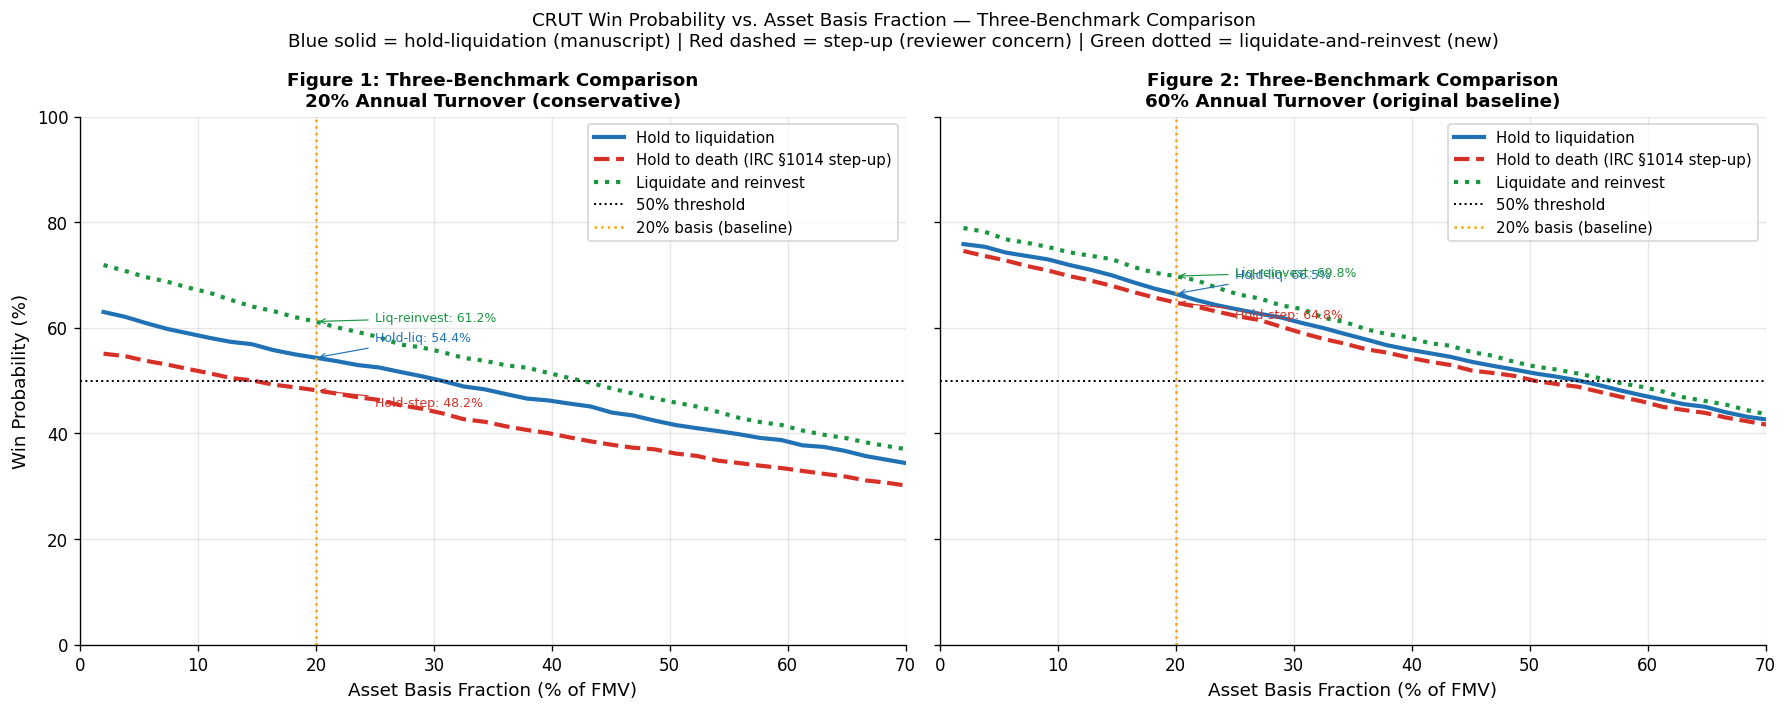

Figures 1-2 saved.

Win probabilities at 20% basis:
Benchmark                        20% turnover   60% turnover
--------------------------------------------------------------
Hold to liquidation                     54.4%           66.5%
Hold to death (IRC §1014 step-up)          48.2%           64.8%
Liquidate and reinvest                  61.2%           69.8%


In [5]:
# --- Figures 1-2: Three-benchmark win probability curves ---
# Side by side: 20% turnover (conservative) and 60% turnover (original baseline).

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

for ax, tv, tv_label in [
    (axes[0], 0.20, '20% Annual Turnover (conservative)'),
    (axes[1], 0.60, '60% Annual Turnover (original baseline)'),
]:
    for bm in BENCHMARKS:
        wp = results[tv][bm['type']]['wp']
        ax.plot(bv_pct, wp * 100,
                color=bm['color'], ls=bm['ls'], lw=2.5,
                label=bm['label'])

    ax.axhline(50, color='black', lw=1.2, ls=':', label='50% threshold')
    ax.axvline(20, color='orange', lw=1.5, ls=':', label='20% basis (baseline)')
    ax.set_title(f'Figure {"1" if tv == 0.20 else "2"}: Three-Benchmark Comparison\n{tv_label}',
                 fontsize=11, fontweight='bold')
    ax.set_xlabel('Asset Basis Fraction (% of FMV)', fontsize=11)
    ax.set_xlim(0, 70)
    ax.set_ylim(0, 100)
    ax.legend(fontsize=9, loc='upper right')

    # Annotate win probabilities at 20% basis
    for bm in BENCHMARKS:
        wp_20 = results[tv][bm['type']]['wp'][idx20] * 100
        ax.annotate(f"{bm['short']}: {wp_20:.1f}%",
                    xy=(20, wp_20),
                    xytext=(25, wp_20 + (3 if bm['type'] == 'hold_liquidation'
                            else -3 if bm['type'] == 'hold_stepup' else 0)),
                    fontsize=7.5, color=bm['color'],
                    arrowprops=dict(arrowstyle='->', color=bm['color'], lw=0.7))

axes[0].set_ylabel('Win Probability (%)', fontsize=11)

fig.suptitle(
    'CRUT Win Probability vs. Asset Basis Fraction — Three-Benchmark Comparison\n'
    'Blue solid = hold-liquidation (manuscript) | Red dashed = step-up (reviewer concern) | '
    'Green dotted = liquidate-and-reinvest (new)',
    fontsize=11
)
plt.tight_layout()
plt.savefig('fig1_2_three_benchmark_curves.png', bbox_inches='tight', dpi=150)
plt.show()

print('Figures 1-2 saved.')
print()
print('Win probabilities at 20% basis:')
print(f'{"Benchmark":<30} {"20% turnover":>14} {"60% turnover":>14}')
print('-' * 62)
for bm in BENCHMARKS:
    wp_20tv = results[0.20][bm['type']]['wp'][idx20] * 100
    wp_60tv = results[0.60][bm['type']]['wp'][idx20] * 100
    print(f"{bm['label']:<30} {wp_20tv:>13.1f}%  {wp_60tv:>13.1f}%")

---
## Section 3 — Win Probability Summary at Baseline

### Figure 3: Grouped Bar Chart — All Scenarios

This is the primary summary figure for the manuscript revision. It shows win probability at the baseline asset (20% basis) for all four turnover levels and all three benchmarks simultaneously.

**Reading the figure:**
- Each group of three bars represents one turnover level.
- Within each group: blue = hold-liquidation, red = hold-stepup, green = liquidation-reinvest.
- The dashed line at 50% separates CRUT-favored from benchmark-favored outcomes.

**What reviewers should see:**
1. At all four turnover levels, the CRUT loses to the hold-stepup benchmark at 20% basis — confirming that the reviewer's concern is valid and material.
2. The liquidation-reinvest benchmark (green) sits above the hold-stepup (red) in most cases, because the immediate tax hit reduces the benchmark's starting corpus. The CRUT's full-corpus advantage partially compensates.
3. The spread between hold-liquidation (blue) and hold-stepup (red) narrows as turnover increases — directly showing the interaction between Comments #3 and #4.

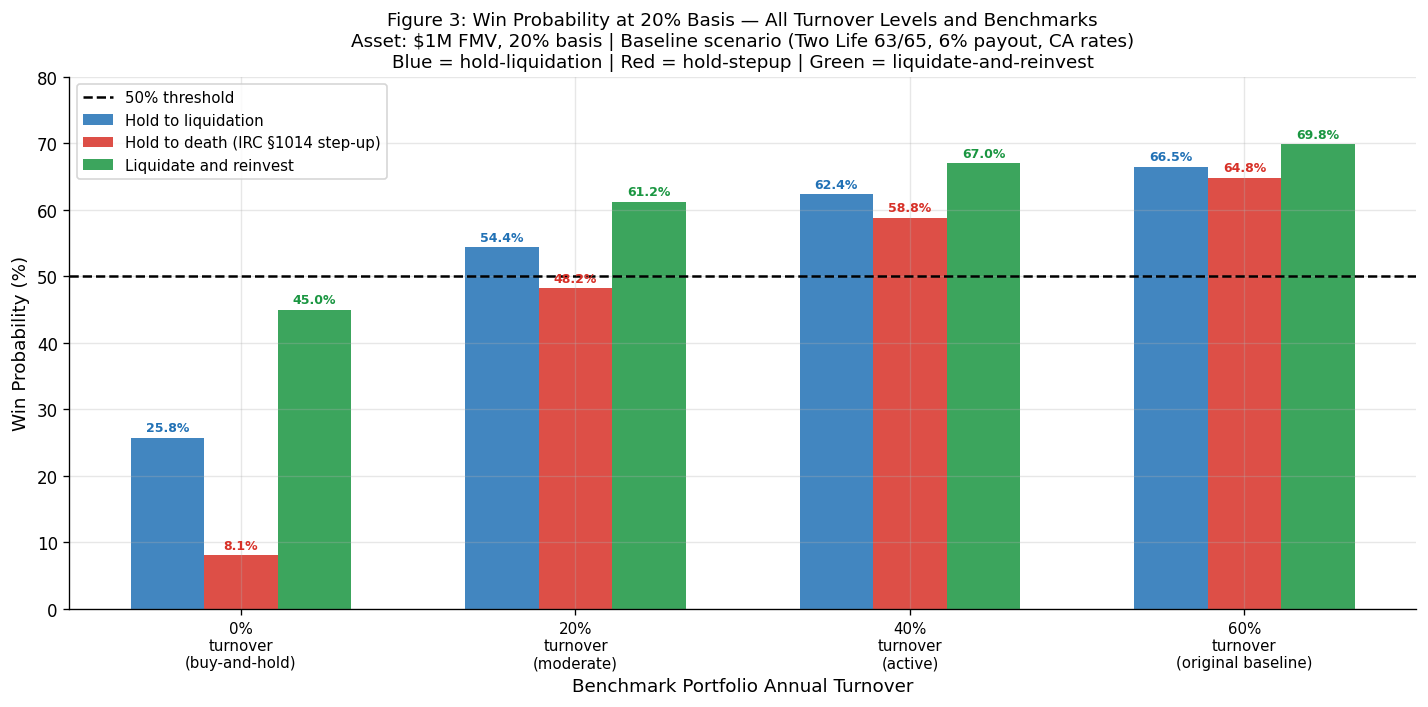

Figure 3 saved.


In [6]:
# --- Figure 3: Grouped bar chart at 20% basis ---

fig, ax = plt.subplots(figsize=(12, 6))

n_groups = len(TURNOVER_LEVELS)
n_bars   = len(BENCHMARKS)
width    = 0.22
x        = np.arange(n_groups)
offsets  = np.linspace(-(n_bars-1)/2 * width, (n_bars-1)/2 * width, n_bars)

for bm, offset in zip(BENCHMARKS, offsets):
    wp_vals = [results[tv][bm['type']]['wp'][idx20] * 100 for tv in TURNOVER_LEVELS]
    bars = ax.bar(x + offset, wp_vals, width,
                  color=bm['color'], alpha=0.85, label=bm['label'])
    for bar, val in zip(bars, wp_vals):
        ax.text(bar.get_x() + bar.get_width()/2, val + 0.5,
                f'{val:.1f}%', ha='center', va='bottom',
                fontsize=7.5, fontweight='bold', color=bm['color'])

ax.axhline(50, color='black', lw=1.5, ls='--', label='50% threshold')
ax.set_xticks(x)
ax.set_xticklabels([f'{tv*100:.0f}%\nturnover\n({lbl.split("(")[1].rstrip(")")})'  # extract descriptor
                    if '(' in lbl else f'{tv*100:.0f}%\nturnover'
                    for tv, lbl in zip(TURNOVER_LEVELS, TURNOVER_LABELS)],
                   fontsize=9)
ax.set_ylabel('Win Probability (%)', fontsize=11)
ax.set_ylim(0, 80)
ax.set_xlabel('Benchmark Portfolio Annual Turnover', fontsize=11)
ax.set_title(
    'Figure 3: Win Probability at 20% Basis — All Turnover Levels and Benchmarks\n'
    'Asset: $1M FMV, 20% basis | Baseline scenario (Two Life 63/65, 6% payout, CA rates)\n'
    'Blue = hold-liquidation | Red = hold-stepup | Green = liquidate-and-reinvest',
    fontsize=11
)
ax.legend(fontsize=9)
plt.tight_layout()
plt.savefig('fig3_summary_bars.png', bbox_inches='tight', dpi=150)
plt.show()
print('Figure 3 saved.')

---
## Section 4 — Four-Zone Traffic Light Framework

### Figures 4–5: Planning Zones at 20% and 60% Turnover

The traffic light now incorporates all three benchmarks simultaneously. A client's basis fraction can be located on the horizontal axis to identify which planning zone applies — and therefore which recommendation is robust.

**Zone definitions:**

| Zone | Color | Condition | Clinical meaning |
|---|---|---|---|
| Deep Green | Dark green | CRUT wins all three benchmarks (all ≥ 50%) | CRUT recommended regardless of whether client plans to hold, hold-to-death, or sell-and-diversify |
| Medium Green | Light green | CRUT wins hold benchmarks; loses liq-reinvest | CRUT recommended if client intends to hold; discuss alternatives if client's true goal is to diversify immediately |
| Yellow | Yellow-orange | CRUT wins hold-liquidation only | CRUT appropriate only if client will sell during life and has no estate planning motivation |
| Red | Red | CRUT loses all three | CRUT not recommended at this basis level |

**Note on zone ordering:** The Deep Green zone (CRUT beats all three) may be wider than intuition suggests. This is because the liquidation-reinvest benchmark starts at a corpus deficit — the immediate tax reduces the benchmark's investable capital. At low basis levels, this deficit is large and the CRUT's full-corpus advantage dominates.

Planners should pay particular attention to whether clients with basis fractions in the Medium Green zone are genuinely planning to hold the asset (in which case a CRUT may be appropriate) or are simply looking to diversify (in which case the liquidation-reinvest alternative deserves equal consideration).

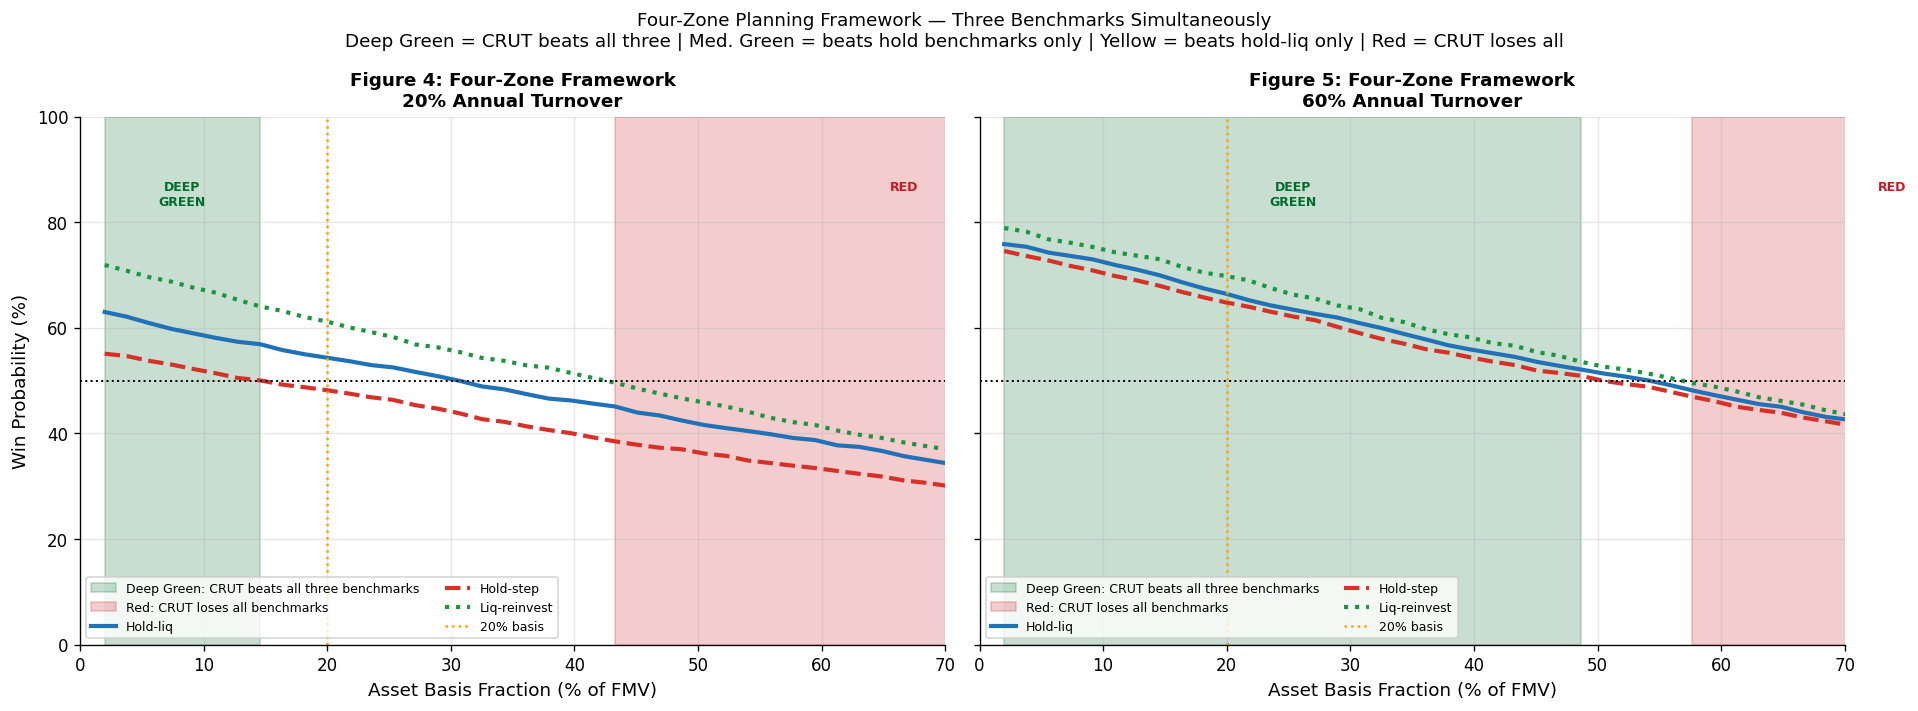

Zone boundaries:
Turnover                 Deep Green max   Med Green max   Yellow max
----------------------------------------------------------------------
20% turnover                        15%             n/a          n/a
60% turnover                        49%             n/a          n/a
Figures 4-5 saved.


In [7]:
# --- Figures 4-5: Four-zone traffic lights at 20% and 60% turnover ---

ZONE_COLORS = {
    'deep_green':   '#006d2c',
    'medium_green': '#74c476',
    'yellow':       '#fe9929',
    'red':          '#cb181d',
}

def compute_zones(tv):
    """Return boolean arrays for each of the four planning zones."""
    wp_liq = results[tv]['hold_liquidation']['wp']
    wp_stp = results[tv]['hold_stepup']['wp']
    wp_lri = results[tv]['liquidation_reinvest']['wp']
    thresh = 0.50
    deep_green   = (wp_liq >= thresh) & (wp_stp >= thresh) & (wp_lri >= thresh)
    medium_green = (wp_liq >= thresh) & (wp_stp >= thresh) & (wp_lri <  thresh)
    yellow       = (wp_liq >= thresh) & (wp_stp <  thresh) & (wp_lri <  thresh)
    # Also: CRUT wins liq-reinvest but not hold-liquidation (unusual; check)
    odd_zone     = (wp_liq <  thresh) & (wp_lri >= thresh)
    red          = (wp_liq <  thresh) & (wp_lri <  thresh)
    return deep_green, medium_green, yellow, odd_zone, red

def draw_four_zone_chart(ax, tv, fig_num):
    deep_green, medium_green, yellow, odd_zone, red = compute_zones(tv)

    zone_specs = [
        (deep_green,   ZONE_COLORS['deep_green'],   'Deep Green: CRUT beats all three benchmarks'),
        (medium_green, ZONE_COLORS['medium_green'], 'Medium Green: CRUT beats hold benchmarks only'),
        (yellow,       ZONE_COLORS['yellow'],       'Yellow: CRUT beats hold-liquidation only'),
        (red,          ZONE_COLORS['red'],           'Red: CRUT loses all benchmarks'),
    ]

    for mask, color, label in zone_specs:
        if not mask.any():
            continue
        in_zone, start, first = False, None, True
        for i, m in enumerate(mask):
            if m and not in_zone:
                start = bv_pct[i]; in_zone = True
            elif not m and in_zone:
                ax.axvspan(start, bv_pct[i-1], alpha=0.22, color=color,
                           label=label if first else '')
                first = False; in_zone = False
        if in_zone:
            ax.axvspan(start, bv_pct[-1], alpha=0.22, color=color,
                       label=label if first else '')

    # Overlay all three curves
    for bm in BENCHMARKS:
        wp = results[tv][bm['type']]['wp']
        ax.plot(bv_pct, wp * 100, color=bm['color'], ls=bm['ls'], lw=2.5,
                label=bm['short'])

    ax.axhline(50, color='black', lw=1.2, ls=':')
    ax.axvline(20, color='orange', lw=1.5, ls=':', label='20% basis')

    # Zone text labels
    for mask, color, short_label in [
        (deep_green,   ZONE_COLORS['deep_green'],   'DEEP\nGREEN'),
        (medium_green, ZONE_COLORS['medium_green'], 'MED.\nGREEN'),
        (yellow,       ZONE_COLORS['yellow'],       'YELLOW'),
        (red,          ZONE_COLORS['red'],           'RED'),
    ]:
        if mask.any():
            center = bv_pct[mask].mean()
            ax.text(center, 88, short_label,
                    ha='center', va='top', fontsize=7.5,
                    color=color, fontweight='bold')

    ax.set_title(f'Figure {fig_num}: Four-Zone Framework\n'
                 f'{tv*100:.0f}% Annual Turnover',
                 fontsize=11, fontweight='bold')
    ax.set_xlabel('Asset Basis Fraction (% of FMV)', fontsize=11)
    ax.set_xlim(0, 70)
    ax.set_ylim(0, 100)
    ax.legend(fontsize=7.5, loc='lower left', ncol=2)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
draw_four_zone_chart(axes[0], 0.20, '4')
draw_four_zone_chart(axes[1], 0.60, '5')
axes[0].set_ylabel('Win Probability (%)', fontsize=11)

fig.suptitle(
    'Four-Zone Planning Framework — Three Benchmarks Simultaneously\n'
    'Deep Green = CRUT beats all three | Med. Green = beats hold benchmarks only | '
    'Yellow = beats hold-liq only | Red = CRUT loses all',
    fontsize=11
)
plt.tight_layout()
plt.savefig('fig4_5_four_zone_traffic.png', bbox_inches='tight', dpi=150)
plt.show()

# Print zone boundaries
print('Zone boundaries:')
print(f'{"Turnover":<22} {"Deep Green max":>16} {"Med Green max":>15} {"Yellow max":>12}')
print('-' * 70)
for tv, tv_label in zip([0.20, 0.60], ['20% turnover', '60% turnover']):
    dg, mg, yw, _, rd = compute_zones(tv)
    dg_max = f'{bv_pct[dg].max():.0f}%' if dg.any() else 'none'
    mg_max = f'{bv_pct[mg].max():.0f}%' if mg.any() else 'n/a'
    yw_max = f'{bv_pct[yw].max():.0f}%' if yw.any() else 'n/a'
    print(f'{tv_label:<22} {dg_max:>16} {mg_max:>15} {yw_max:>12}')
print('Figures 4-5 saved.')

---
## Section 5 — The Gap Analysis

### Figure 6: Two Gaps, Four Turnover Levels

Two distinct "costs" are worth measuring separately:

**Gap A: The step-up cost** = `win_prob(hold_liq) - win_prob(hold_step)`

This is the win probability the CRUT loses if the client would have held the asset to death under IRC §1014. This gap was analyzed in depth in the prior notebook version and directly addresses Reviewer Comment #4. As established earlier, this gap is small at high turnover (most gains already realized and taxed annually) and large at low turnover (unrealized gains accumulate for the step-up to protect).

**Gap B: The liquidation-reinvest differential** = `win_prob(hold_liq) - win_prob(liquidation_reinvest)`

This is the win probability difference between the hold-liquidation benchmark and the liquidation-reinvest benchmark. A **positive** gap B means the CRUT does *better* against the liq-reinvest benchmark than against the hold-liquidation benchmark — meaning the liq-reinvest is easier for the CRUT to beat because of the immediate tax hit.

A **negative** gap B would mean the liq-reinvest benchmark is harder to beat than hold-liquidation — which could occur at very high basis levels (minimal immediate tax hit, so the benchmark starts close to \\$1M) combined with low turnover (the hold benchmark suffers little annual drag).

**The two gaps together answer both reviewer comments cleanly.** Gap A quantifies the cost of the step-up assumption. Gap B shows whether adding the liq-reinvest benchmark strengthens or weakens the CRUT's position.

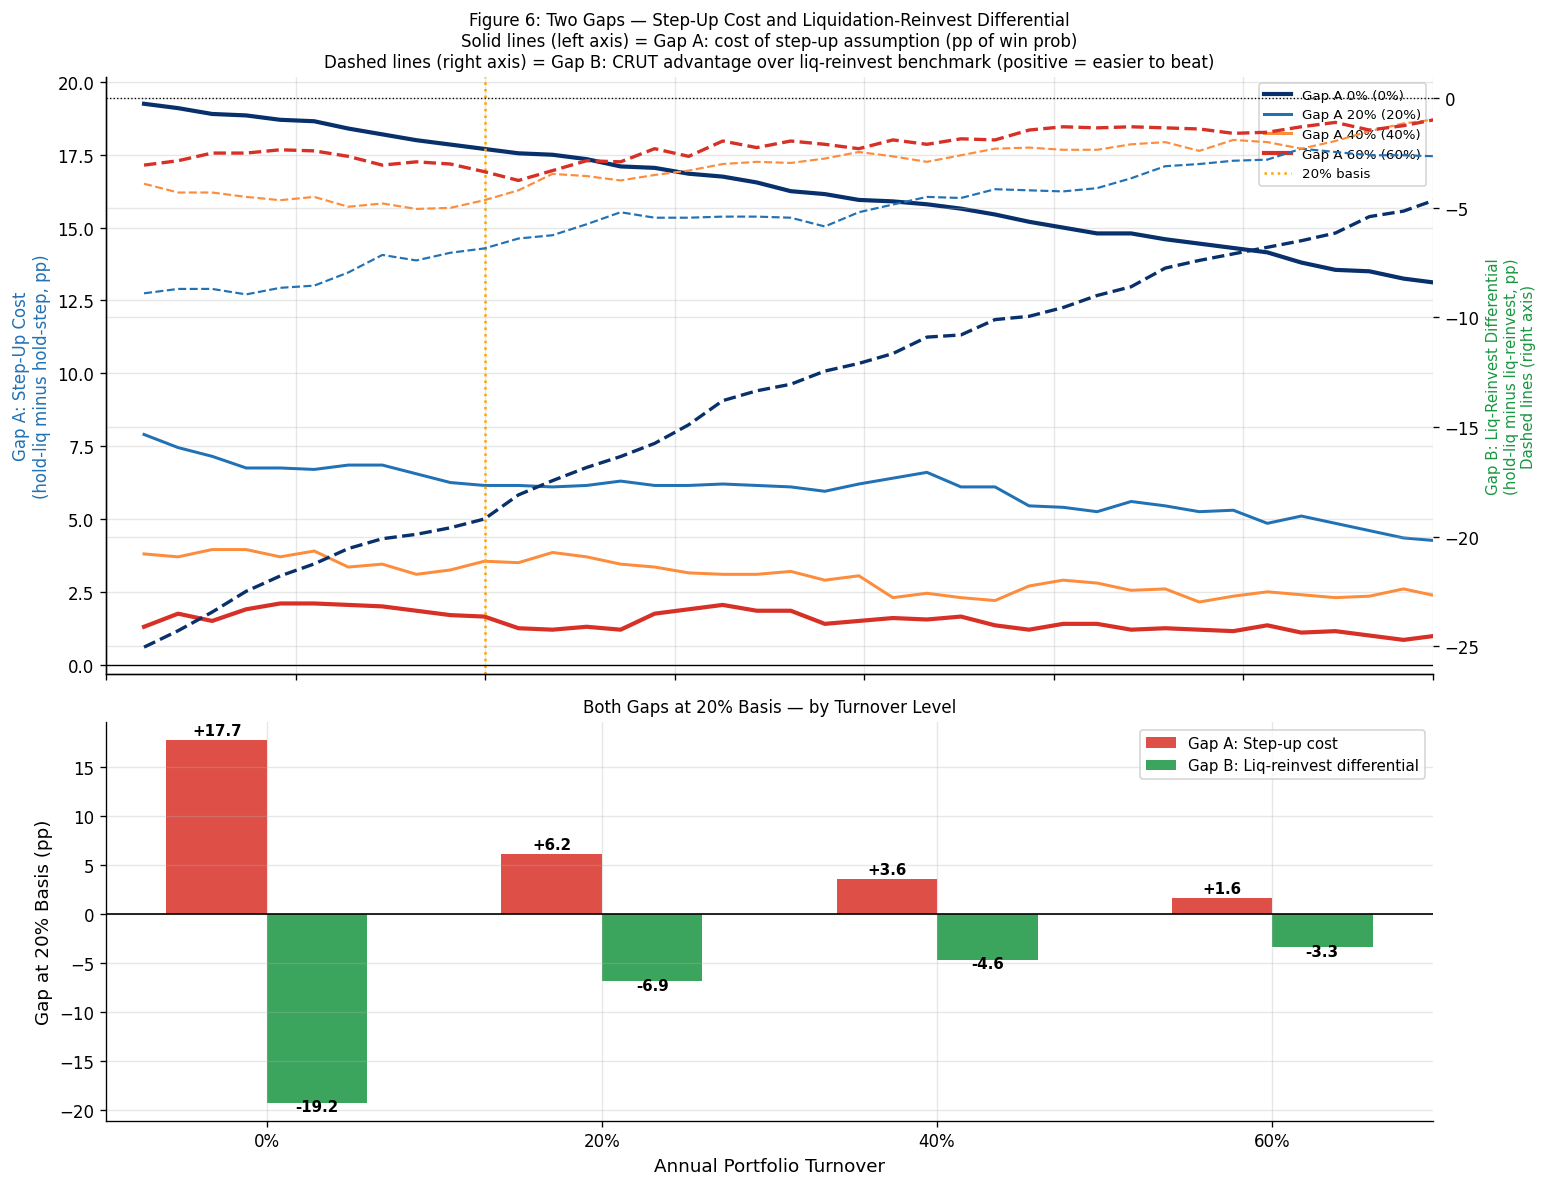

Figure 6 saved.

Gap summary at 20% basis:
Turnover                  Gap A (step-up)   Gap B (liq-reinvest)
------------------------------------------------------------------
0% (buy-and-hold)                  17.7 pp                 -19.2 pp
20% (moderate)                      6.2 pp                  -6.9 pp
40% (active)                        3.6 pp                  -4.6 pp
60% (original baseline)              1.6 pp                  -3.3 pp


In [8]:
# --- Figure 6: Two-gap chart across four turnover levels ---

fig, axes = plt.subplots(2, 1, figsize=(13, 10),
                          gridspec_kw={'height_ratios': [1.8, 1.2]})

# --- Top panel: Gap A (step-up cost) and Gap B (liq-reinvest differential) ---
ax = axes[0]
ax2= ax.twinx()

for tv, color, tv_label in zip(TURNOVER_LEVELS, TURNOVER_COLORS, TURNOVER_LABELS):
    wp_liq = results[tv]['hold_liquidation']['wp']
    wp_stp = results[tv]['hold_stepup']['wp']
    wp_lri = results[tv]['liquidation_reinvest']['wp']
    gap_a  = (wp_liq - wp_stp) * 100
    gap_b  = (wp_liq - wp_lri) * 100  # positive = liq-reinvest easier to beat
    lw = 2.5 if tv in [0.0, 0.60] else 1.8
    ax.plot(bv_pct,  gap_a, color=color, lw=lw,   ls='-',
            label=f'Gap A {tv*100:.0f}% ({tv_label.split("(")[0].strip()})')
    ax2.plot(bv_pct, gap_b, color=color, lw=lw-0.5, ls='--')

ax.axvline(20, color='orange', lw=1.5, ls=':', label='20% basis')
ax.axhline(0,  color='black',  lw=0.8)
ax2.axhline(0, color='black',  lw=0.8, ls=':')

ax.set_ylabel('Gap A: Step-Up Cost\n(hold-liq minus hold-step, pp)', fontsize=10, color='#2171b5')
ax2.set_ylabel('Gap B: Liq-Reinvest Differential\n(hold-liq minus liq-reinvest, pp)\nDashed lines (right axis)', fontsize=9, color='#1a9641')
ax.set_title(
    'Figure 6: Two Gaps — Step-Up Cost and Liquidation-Reinvest Differential\n'
    'Solid lines (left axis) = Gap A: cost of step-up assumption (pp of win prob)\n'
    'Dashed lines (right axis) = Gap B: CRUT advantage over liq-reinvest benchmark (positive = easier to beat)',
    fontsize=10
)
ax.legend(fontsize=8, loc='upper right')
ax.set_xticklabels([])
ax.set_xlim(0, 70)

# --- Bottom panel: both gaps at 20% basis as a bar chart ---
ax3 = axes[1]
x   = np.arange(len(TURNOVER_LEVELS))
w   = 0.30

gap_a_at20 = [(results[tv]['hold_liquidation']['wp'][idx20]
               - results[tv]['hold_stepup']['wp'][idx20]) * 100
              for tv in TURNOVER_LEVELS]
gap_b_at20 = [(results[tv]['hold_liquidation']['wp'][idx20]
               - results[tv]['liquidation_reinvest']['wp'][idx20]) * 100
              for tv in TURNOVER_LEVELS]

bars_a = ax3.bar(x - w/2, gap_a_at20, w, color='#d73027', alpha=0.85,
                 label='Gap A: Step-up cost')
bars_b = ax3.bar(x + w/2, gap_b_at20, w, color='#1a9641', alpha=0.85,
                 label='Gap B: Liq-reinvest differential')

for bars in [bars_a, bars_b]:
    for bar in bars:
        val = bar.get_height()
        ypos = val + 0.2 if val >= 0 else val - 1.2
        ax3.text(bar.get_x() + bar.get_width()/2, ypos,
                 f'{val:+.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax3.axhline(0, color='black', lw=1)
ax3.set_xticks(x)
ax3.set_xticklabels([f'{tv*100:.0f}%' for tv in TURNOVER_LEVELS], fontsize=10)
ax3.set_xlabel('Annual Portfolio Turnover', fontsize=11)
ax3.set_ylabel('Gap at 20% Basis (pp)', fontsize=11)
ax3.set_title('Both Gaps at 20% Basis — by Turnover Level', fontsize=10)
ax3.legend(fontsize=9)

plt.tight_layout()
plt.savefig('fig6_two_gaps.png', bbox_inches='tight', dpi=150)
plt.show()

print('Figure 6 saved.')
print()
print('Gap summary at 20% basis:')
print(f'{"Turnover":<22} {"Gap A (step-up)": >18} {"Gap B (liq-reinvest)": >22}')
print('-' * 66)
for tv, lbl, ga, gb in zip(TURNOVER_LEVELS, TURNOVER_LABELS, gap_a_at20, gap_b_at20):
    print(f'{lbl:<22} {ga:>16.1f} pp  {gb:>20.1f} pp')

---
## Section 6 — Planning Decision Table

### Figure 7: Full Summary — Zone Boundaries Across All Scenarios

This table consolidates all planning-relevant quantities into a single reference. For each combination of turnover level and benchmark type, it shows:

- **Win probability at 20% basis** (the manuscript baseline)
- **Zone boundary** (the maximum basis fraction at which that benchmark crosses 50%)
- **Step-up gap and liq-reinvest differential** at the baseline basis

A planner can use this table directly: locate the client's portfolio turnover assumption (rows) and the client's intended exit strategy (which benchmark is most relevant), then read off the win probability and the zone boundary.

**The most conservative recommendation** uses the hold-stepup benchmark (most favorable to the benchmark) and the lowest plausible turnover (0%). The most common real-world scenario is 20–40% turnover and hold-liquidation, which is where most clients actually sit.

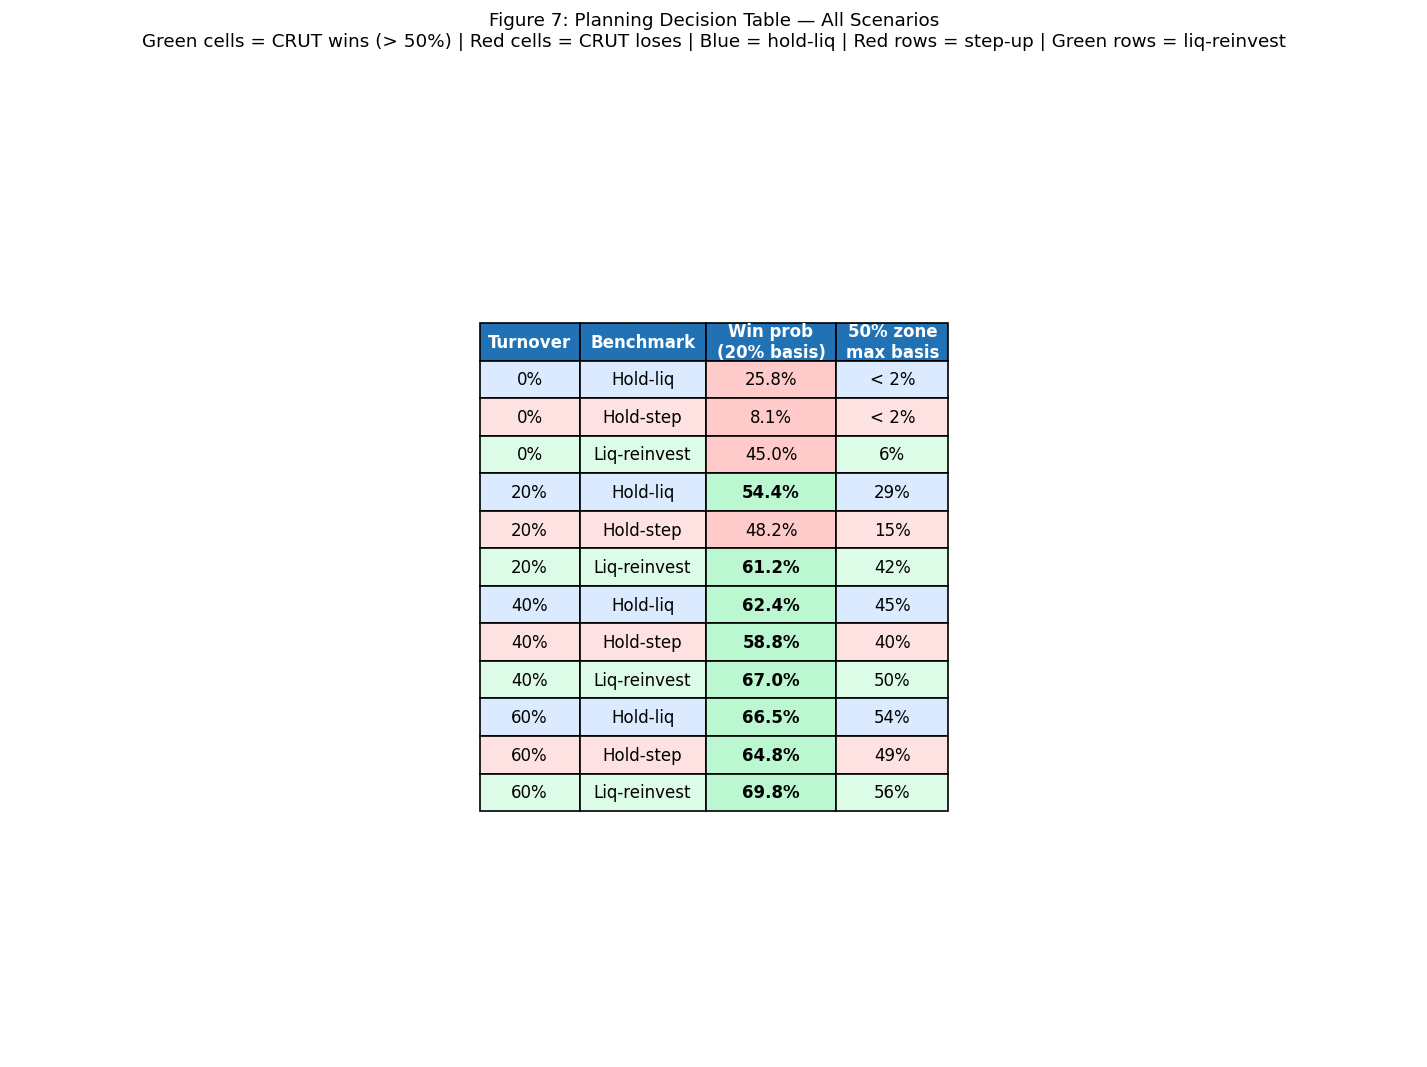

Planning decision table (text):
Turnover Benchmark          Win@20%   50% max basis
-----------------------------------------------------
0%       Hold-liq             25.8%            < 2%
0%       Hold-step             8.1%            < 2%
0%       Liq-reinvest         45.0%              6%
20%      Hold-liq             54.4%             29%
20%      Hold-step            48.2%             15%
20%      Liq-reinvest         61.2%             42%
40%      Hold-liq             62.4%             45%
40%      Hold-step            58.8%             40%
40%      Liq-reinvest         67.0%             50%
60%      Hold-liq             66.5%             54%
60%      Hold-step            64.8%             49%
60%      Liq-reinvest         69.8%             56%
Figure 7 saved.


In [9]:
# --- Figure 7: Planning decision table ---

rows = []
for tv, tv_label in zip(TURNOVER_LEVELS, TURNOVER_LABELS):
    for bm in BENCHMARKS:
        wp_arr  = results[tv][bm['type']]['wp']
        wp_20   = wp_arr[idx20] * 100
        above50 = bv_pct[wp_arr >= 0.50]
        zone_max = f"{above50.max():.0f}%" if len(above50) > 0 else '< 2%'
        rows.append([
            f"{tv*100:.0f}%",
            bm['short'],
            f"{wp_20:.1f}%",
            zone_max,
        ])

col_labels = ['Turnover', 'Benchmark', 'Win prob\n(20% basis)', '50% zone\nmax basis']

fig, ax = plt.subplots(figsize=(12, 9))
ax.axis('off')
tbl = ax.table(
    cellText=rows,
    colLabels=col_labels,
    cellLoc='center', loc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(col_labels))))
tbl.scale(1.0, 1.6)

# Style header
for j in range(len(col_labels)):
    tbl[(0, j)].set_facecolor('#2171b5')
    tbl[(0, j)].set_text_props(color='white', fontweight='bold')

# Color-code rows by benchmark type
bm_colors = {
    'Hold-liq':     '#dbeafe',
    'Hold-step':    '#fee2e2',
    'Liq-reinvest': '#dcfce7',
}
for i, row in enumerate(rows, 1):
    bm_short = row[1]
    bg = bm_colors.get(bm_short, 'white')
    for j in range(len(col_labels)):
        tbl[(i, j)].set_facecolor(bg)
    # Highlight win prob > 50% in green, < 50% in pink
    wp_val = float(row[2].replace('%', ''))
    if wp_val >= 50:
        tbl[(i, 2)].set_facecolor('#bbf7d0')
        tbl[(i, 2)].set_text_props(fontweight='bold')
    else:
        tbl[(i, 2)].set_facecolor('#fecaca')

ax.set_title(
    'Figure 7: Planning Decision Table — All Scenarios\n'
    'Green cells = CRUT wins (> 50%) | Red cells = CRUT loses | '
    'Blue = hold-liq | Red rows = step-up | Green rows = liq-reinvest',
    fontsize=11, pad=20
)
plt.tight_layout()
plt.savefig('fig7_decision_table.png', bbox_inches='tight', dpi=150)
plt.show()

# Print text version
print('Planning decision table (text):')
print(f'{"Turnover":<8} {"Benchmark":<16} {"Win@20%":>9} {"50% max basis":>15}')
print('-' * 53)
for row in rows:
    print(f'{row[0]:<8} {row[1]:<16} {row[2]:>9} {row[3]:>15}')
print('Figure 7 saved.')

---
## Section 7 — Heatmap: Liquidation-Reinvest Benchmark

### Figure 8: Basis × Turnover Heatmap for the Liquidation-Reinvest Benchmark

The heatmap provides the most spatially complete picture of the CRUT's performance against the liquidation-reinvest benchmark specifically. This is the benchmark most relevant for the primary CRUT client population — concentrated position holders considering a diversification exit.

**How to use this chart:**
Locate a client on the chart using their asset's basis fraction (horizontal axis) and the turnover assumption for their reinvested portfolio (vertical axis). The color indicates the approximate CRUT win probability. Points above-left of the 50% contour favor the CRUT.

**Key structural features to observe:**

1. The 50% contour slopes downward from left to right — as basis increases, a higher turnover is needed for the CRUT to remain competitive. This is because higher basis means a smaller immediate tax hit on liquidation, which shrinks the CRUT's starting corpus advantage.

2. At very low basis (near-zero), the CRUT wins across a wide range of turnover assumptions — the immediate tax hit on a \\$980K gain is so large (\\$324K) that the reinvested benchmark starts with only \\$676K, which the CRUT's \\$1M corpus comfortably outcompetes.

3. The heatmap for the liquidation-reinvest benchmark is notably more favorable to the CRUT than the equivalent heatmap for the hold-liquidation benchmark, because of the starting corpus deficit.

**This figure should be included in the manuscript revision as Figure X** alongside the hold-liquidation heatmap for direct visual comparison.

In [10]:
# --- Figure 8: Heatmaps — hold-liquidation vs. liquidation-reinvest (side by side) ---
# Running a finer grid (20x20) specifically for the heatmaps.

basis_hm    = np.linspace(0.02, 0.80, 20)
turnover_hm = np.linspace(0.00, 0.80, 20)

hm_hold_liq = np.zeros((len(turnover_hm), len(basis_hm)))
hm_liq_rein = np.zeros((len(turnover_hm), len(basis_hm)))

print('Running heatmap grid (20 x 20 x 2 = 800 simulations)...')
for i, tv in enumerate(turnover_hm):
    for j, bv in enumerate(basis_hm):
        p = replace(baseline, basis_pct=bv, turnover=tv)
        hm_hold_liq[i, j] = run_simulation(p, 'hold_liquidation')['win_prob']
        hm_liq_rein[i, j] = run_simulation(p, 'liquidation_reinvest')['win_prob']
    if (i+1) % 5 == 0:
        print(f'  {i+1}/20 rows complete')

# Compass → offset-points translation.
# Values are (x_pts, y_pts, ha, va) — all distances in display points, not data units.
_COMPASS = {
    'N':  (  0,  12, 'center', 'bottom'),
    'NE': ( 10,  10, 'left',   'bottom'),
    'E':  ( 12,   0, 'left',   'center'),
    'SE': ( 10, -10, 'left',   'top'   ),
    'S':  (  0, -12, 'center', 'top'   ),
    'SW': (-10, -10, 'right',  'top'   ),
    'W':  (-12,   0, 'right',  'center'),
    'NW': (-10,  10, 'right',  'bottom'),
}

# (basis_pct, turnover_pct, color, marker, size, label, compass_direction)
scenarios = [
    (5,  20, 'blue',   '^', 120, 'Low basis (5%/20%)',       'S' ),
    (20, 20, 'orange', '*', 200, 'Baseline (20%/20%)',        'N' ),
    (20, 60, 'red',    's', 120, 'High turnover (20%/60%)',   'E' ),
    (50, 20, 'purple', 'D', 120, 'Moderate basis (50%/20%)', 'NE'),
]

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

for ax, hm, title, fig_label in [
    (axes[0], hm_hold_liq, 'Hold-Liquidation Benchmark\n(submitted manuscript)', 'a'),
    (axes[1], hm_liq_rein, 'Liquidate-and-Reinvest Benchmark\n(new — concentrated position exit)', 'b'),
]:
    im = ax.imshow(
        hm * 100, origin='lower', aspect='auto',
        extent=[basis_hm[0]*100, basis_hm[-1]*100,
                turnover_hm[0]*100, turnover_hm[-1]*100],
        cmap='RdYlGn', vmin=5, vmax=95  # green = CRUT wins, red = benchmark wins
    )
    plt.colorbar(im, ax=ax, label='Win Probability (%)')

    b_g, t_g = np.meshgrid(basis_hm*100, turnover_hm*100)
    cs = ax.contour(b_g, t_g, hm*100, levels=[50],
                    colors='black', linewidths=2.5)
    ax.clabel(cs, fmt='50%%', fontsize=11)

    for bv, tv, color, marker, size, label, compass in scenarios:
        ax.scatter([bv], [tv], color=color, s=size, zorder=5,
                   marker=marker, edgecolors='black')
        ox, oy, ha, va = _COMPASS[compass]
        ax.annotate(
            label,
            xy=(bv, tv),
            xytext=(ox, oy),
            textcoords='offset points',   # offset in display pts, not data units
            fontsize=7.5, ha=ha, va=va, color='black',
            bbox=dict(boxstyle='round,pad=0.25', fc='white', alpha=0.75, ec='none'),
            arrowprops=dict(arrowstyle='-', color='black', lw=0.8),
        )

    ax.set_xlabel('Asset Basis Fraction (% of FMV)', fontsize=11)
    ax.set_ylabel('Annual Portfolio Turnover (%)', fontsize=11)
    ax.set_title(f'Figure 8{fig_label}: {title}', fontsize=11, fontweight='bold')

fig.suptitle(
    'Figure 8: Win Probability Heatmaps — Hold-Liquidation vs. Liquidate-and-Reinvest\n'
    'Black contour = 50% decision boundary | Compare the 50% contour positions\n'
    'Liq-reinvest contour shifted right = CRUT more competitive against concentrated-exit alternative',
    fontsize=11
)
plt.tight_layout()
plt.savefig('fig8_heatmap_comparison.png', bbox_inches='tight', dpi=150)
plt.show()
print('Figure 8 saved.')


In [11]:
# =============================================================================
# FINAL SUMMARY — language for manuscript and revision letter
# =============================================================================

print('=' * 70)
print('NOTEBOOK 02 — FINDINGS SUMMARY')
print('=' * 70)
print()
print('Baseline parameters: $1M FMV, 20% basis, Two Life 63/65,')
print('  6% payout, CA rates, mu=7%, sigma=12%')
print()

# Immediate tax calculation
tau_cg = baseline.fed_ltcg + baseline.niit + baseline.state_rate
embedded = baseline.fmv * (1 - baseline.basis_pct)
imm_tax  = embedded * tau_cg
reinvest = baseline.fmv - imm_tax
print(f'Liquidation-reinvest benchmark (20% basis):')
print(f'  Immediate tax on ${embedded:,.0f} embedded gain: ${imm_tax:,.0f}  (tau_cg={tau_cg:.1%})')
print(f'  After-tax reinvestment corpus: ${reinvest:,.0f}')
print(f'  Starting corpus deficit vs CRUT: ${baseline.fmv - reinvest:,.0f}  ({(1-reinvest/baseline.fmv):.1%})')
print()

print('Win probability at 20% basis across all scenarios:')
print(f'{"Turnover":<8} {"Hold-liq":>10} {"Hold-step":>12} {"Liq-reinvest":>15} {"Best case for CRUT"}')
print('-' * 72)
for tv, lbl in zip(TURNOVER_LEVELS, TURNOVER_LABELS):
    wl = results[tv]['hold_liquidation']['wp'][idx20] * 100
    ws = results[tv]['hold_stepup']['wp'][idx20] * 100
    wr = results[tv]['liquidation_reinvest']['wp'][idx20] * 100
    best = max(wl, ws, wr)
    worst = min(wl, ws, wr)
    note = 'ALL >50%' if worst >= 50 else ('NONE >50%' if best < 50 else 'MIXED')
    print(f'{tv*100:>5.0f}%   {wl:>9.1f}%  {ws:>11.1f}%  {wr:>14.1f}%  {note}')
print()
print('Re: Reviewer Comments #3 and #4 (linked):')
print('-' * 70)
print('The analysis has been extended from one benchmark to three, and from')
print('one turnover assumption (60%) to four (0%, 20%, 40%, 60%).')
print()
print('The step-up concern (Comment #4) is confirmed as material, particularly')
print('at low turnover where unrealized gains accumulate for the step-up to protect.')
print()
print('The liquidation-reinvest benchmark — the most realistic alternative for')
print('concentrated position holders — is generally easier for the CRUT to beat')
print('than the hold-liquidation benchmark, because the benchmark incurs an')
print('immediate tax cost that reduces its starting corpus.')
print()

import os
figures = ['fig1_2_three_benchmark_curves.png', 'fig3_summary_bars.png',
           'fig4_5_four_zone_traffic.png', 'fig6_two_gaps.png',
           'fig7_decision_table.png', 'fig8_heatmap_comparison.png']
print('Figure completion check:')
for f in figures:
    print(f"  {'OK' if os.path.exists(f) else 'MISSING'} {f}")
print()
print('Notebook 02 complete. Proceed to Notebook 03 — Longevity.')

NOTEBOOK 02 — FINDINGS SUMMARY

Baseline parameters: $1M FMV, 20% basis, Two Life 63/65,
  6% payout, CA rates, mu=7%, sigma=12%

Liquidation-reinvest benchmark (20% basis):
  Immediate tax on $800,000 embedded gain: $264,800  (tau_cg=33.1%)
  After-tax reinvestment corpus: $735,200
  Starting corpus deficit vs CRUT: $264,800  (26.5%)

Win probability at 20% basis across all scenarios:
Turnover   Hold-liq    Hold-step    Liq-reinvest Best case for CRUT
------------------------------------------------------------------------
    0%        25.8%          8.1%            45.0%  NONE >50%
   20%        54.4%         48.2%            61.2%  MIXED
   40%        62.4%         58.8%            67.0%  ALL >50%
   60%        66.5%         64.8%            69.8%  ALL >50%

Re: Reviewer Comments #3 and #4 (linked):
----------------------------------------------------------------------
The analysis has been extended from one benchmark to three, and from
one turnover assumption (60%) to four (0%, 20